In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import sklearn.metrics as m
from sklearn.manifold import TSNE
sns.set(palette='Set1')

In [2]:
whdf=pd.read_csv('C:/Users/Claire/Downloads/FinalP_WorldHappiness/2019_norm.csv')

In [3]:
whdf.shape

(156, 11)

In [4]:
whdf.head()

,Country,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Paraguay,0.602564,0.429487,1.000000,0.250000,0.814103,0.788462,0.487179,0.576923,0.429487,0.487179
1,Somalia,0.288462,0.532051,0.993590,0.115385,0.076923,0.916667,0.102564,0.391026,0.000000,0.083333
2,Iceland,0.980769,0.948718,0.987179,0.019231,1.000000,0.961538,0.288462,0.987179,0.910256,0.923077
3,Costa Rica,0.929487,0.608974,0.980769,0.557692,0.737179,0.903846,0.371795,0.525641,0.576923,0.826923
4,Laos,0.333333,0.628205,0.974359,0.717949,0.237179,0.865385,0.173077,0.788462,0.352564,0.288462


In [5]:
whdf.sort_values(by=['Ladder'], ascending=False)

,Country,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
40,Finland,1.000000,0.980769,0.743590,0.064103,0.993590,0.974359,0.025641,0.705128,0.865385,0.833333
23,Denmark,0.993590,0.923077,0.852564,0.166667,0.980769,0.967949,0.019231,0.865385,0.916667,0.858974
15,Norway,0.987179,0.955128,0.903846,0.185897,0.987179,0.987179,0.051282,0.935897,0.961538,0.929487
2,Iceland,0.980769,0.948718,0.987179,0.019231,1.000000,0.961538,0.288462,0.987179,0.910256,0.923077
11,Netherlands,0.974359,1.000000,0.929487,0.160256,0.910256,0.884615,0.076923,0.961538,0.929487,0.891026
43,Switzerland,0.967949,0.935897,0.724359,0.134615,0.923077,0.935897,0.044872,0.903846,0.955128,0.980769
33,Sweden,0.961538,0.891026,0.788462,0.051282,0.846154,0.942308,0.038462,0.897436,0.923077,0.897436
21,New Zealand,0.955128,0.910256,0.865385,0.076923,0.974359,0.955128,0.032051,0.955128,0.839744,0.916667
17,Canada,0.948718,0.858974,0.891026,0.314103,0.878205,0.948718,0.070513,0.916667,0.884615,0.955128
63,Austria,0.942308,0.942308,0.596154,0.153846,0.807692,0.839744,0.121795,0.846154,0.903846,0.910256


In [6]:
australia_nz = ["Australia","New Zealand"]
central_eastern_europe = ["Albania","Armenia","Azerbaijan","Belarus","Bosnia and Herzegovina","Bulgaria","Croatia","Czech Republic","Estonia","Georgia","Hungary","Kazakhstan","Kosovo","Kyrgyzstan","Latvia","Lithuania","Macedonia","Moldova","Montenegro","Poland","Romania","Russia","Serbia","Slovakia","Slovenia","Tajikistan","Turkmenistan","Ukraine","Uzbekistan"]
eastern_asia = ["China","Hong Kong","Japan","Mongolia","South Korea","Taiwan"]
latam = ["Argentina","Belize","Bolivia","Brazil","Chile","Colombia","Costa Rica","Dominican Republic","Ecuador","El Salvador","Guatemala","Haiti","Honduras","Jamaica","Mexico","Nicaragua","Panama","Paraguay","Peru","Puerto Rico","Suriname","Trinidad and Tobago","Uruguay","Venezuela"]
ME_N_africa = ["Algeria","Bahrain","Egypt","Iran","Iraq","Israel","Jordan","Kuwait","Lebanon","Libya","Morocco","Palestinian Territories","Qatar","Saudi Arabia","Syria","Tunisia","Turkey","United Arab Emirates","Yemen"]
N_america = ["Canada","United States"]
SE_asia = ["Cambodia","Indonesia","Laos","Malaysia","Myanmar","Philippines","Singapore","Thailand","Vietnam"]
S_asia = ["Afghanistan","Bangladesh","Bhutan","India","Nepal","Pakistan","Sri Lanka"]
sub_S_africa = ["Angola","Benin","Botswana","Burkina Faso","Burundi","Cameroon","Chad","Comoros","Congo (Brazzaville)","Congo (Kinshasa)","Ethiopia","Gabon","Ghana","Guinea","Ivory Coast","Kenya","Liberia","Madagascar","Malawi","Mali","Mauritania","Mauritius","Namibia","Niger","Nigeria","Rwanda","Senegal","Sierra Leone","Somalia","Somaliland Region","South Africa","South Sudan","Sudan","Tanzania","Togo","Uganda","Zambia","Zimbabwe"]
western_europe = ["Austria","Belgium","Cyprus","Denmark","Finland","France","Germany","Greece","Iceland","Ireland","Italy","Luxembourg","Malta","Netherlands","North Cyprus","Norway","Portugal","Spain","Sweden","Switzerland","United Kingdom"]

d_australia_nz = dict.fromkeys(australia_nz, 'Australia and New Zealand')
d_central_eastern_europe = dict.fromkeys(central_eastern_europe, 'Central and Eastern Europe')
d_eastern_asia = dict.fromkeys(eastern_asia, 'Eastern Asia')
d_latam = dict.fromkeys(latam, 'Latin America and Caribbean')
d_ME_N_africa =dict.fromkeys(ME_N_africa,'Middle East and Northern Africa')
d_N_america = dict.fromkeys(N_america, 'North America')
d_SE_asia = dict.fromkeys(SE_asia, 'Southeastern Asia')
d_S_asia =dict.fromkeys(S_asia, 'Southern Asia')
d_sub_S_africa = dict.fromkeys(sub_S_africa, 'Sub-Saharan Africa')
d_western_europe = dict.fromkeys(western_europe, 'Western Europe')

continent_dict = {**d_australia_nz, **d_central_eastern_europe, **d_eastern_asia, **d_latam, **d_ME_N_africa, 
                  **d_N_america, **d_SE_asia, **d_S_asia, **d_sub_S_africa, **d_western_europe}

whdf["Region"] = whdf["Country"].map(continent_dict)
whdf.Region.fillna("Africa", inplace=True)

In [7]:
whdf.dtypes

Country                     object
Ladder                     float64
SD of Ladder               float64
Positive affect            float64
Negative affect            float64
Social support             float64
Freedom                    float64
Corruption                 float64
Generosity                 float64
Log of GDP per capita      float64
Healthy life expectancy    float64
Region                      object
dtype: object

In [8]:
whdf.isna().sum()

Country                    0
Ladder                     0
SD of Ladder               0
Positive affect            0
Negative affect            0
Social support             0
Freedom                    0
Corruption                 0
Generosity                 0
Log of GDP per capita      0
Healthy life expectancy    0
Region                     0
dtype: int64

In [9]:
whdf.describe()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.503205,0.503205,0.503164,0.496795,0.503164,0.503164,0.453074,0.503164,0.502794,0.502342
std,0.289599,0.289599,0.289670,0.289599,0.289670,0.289670,0.287719,0.289670,0.290303,0.291061
min,0.006410,0.006410,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.254808,0.254808,0.254808,0.248397,0.254808,0.254808,0.203526,0.254808,0.254808,0.254808
50%,0.503205,0.503205,0.503205,0.496795,0.503205,0.503205,0.451923,0.503205,0.503205,0.503205
75%,0.751603,0.751603,0.751603,0.745192,0.751603,0.751603,0.700321,0.751603,0.751603,0.751603
max,1.000000,1.000000,1.000000,0.993590,1.000000,1.000000,0.948718,1.000000,1.000000,1.000000


In [10]:
whdf_2019=whdf.drop(['SD of Ladder'], axis=1)
whdf_2019.sort_values(by=['Ladder'], ascending=False)

,Country,Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy,Region
40,Finland,1.000000,0.743590,0.064103,0.993590,0.974359,0.025641,0.705128,0.865385,0.833333,Western Europe
23,Denmark,0.993590,0.852564,0.166667,0.980769,0.967949,0.019231,0.865385,0.916667,0.858974,Western Europe
15,Norway,0.987179,0.903846,0.185897,0.987179,0.987179,0.051282,0.935897,0.961538,0.929487,Western Europe
2,Iceland,0.980769,0.987179,0.019231,1.000000,0.961538,0.288462,0.987179,0.910256,0.923077,Western Europe
11,Netherlands,0.974359,0.929487,0.160256,0.910256,0.884615,0.076923,0.961538,0.929487,0.891026,Western Europe
43,Switzerland,0.967949,0.724359,0.134615,0.923077,0.935897,0.044872,0.903846,0.955128,0.980769,Western Europe
33,Sweden,0.961538,0.788462,0.051282,0.846154,0.942308,0.038462,0.897436,0.923077,0.897436,Western Europe
21,New Zealand,0.955128,0.865385,0.076923,0.974359,0.955128,0.032051,0.955128,0.839744,0.916667,Australia and New Zealand
17,Canada,0.948718,0.891026,0.314103,0.878205,0.948718,0.070513,0.916667,0.884615,0.955128,North America
63,Austria,0.942308,0.596154,0.153846,0.807692,0.839744,0.121795,0.846154,0.903846,0.910256,Western Europe


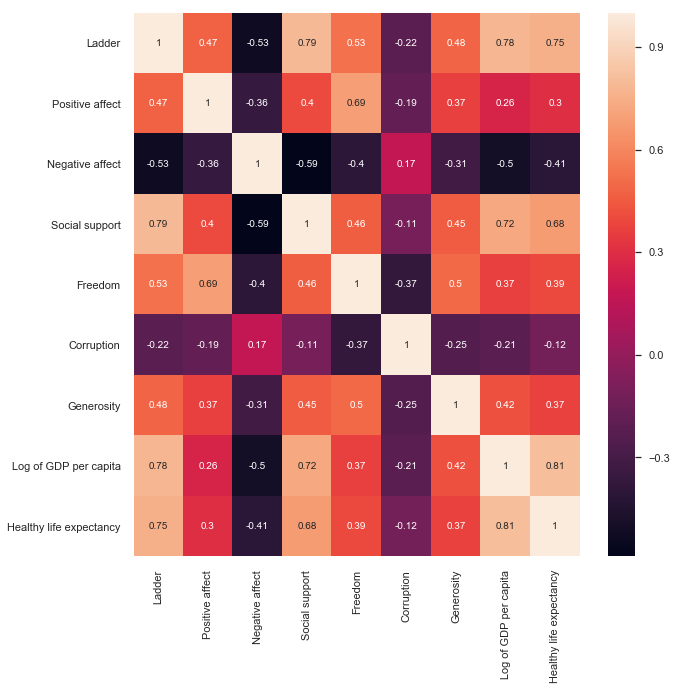

In [11]:
#heat map

plt.subplots(figsize=(10,10))
sns.heatmap(whdf_2019.corr(), annot = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

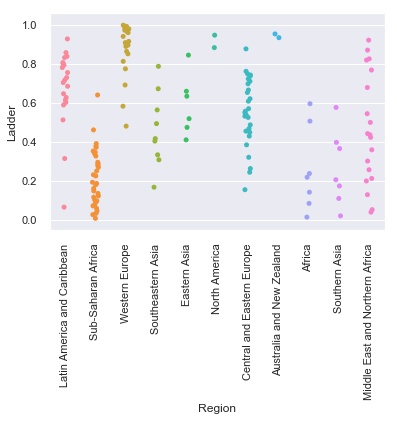

In [12]:
sns.stripplot(x="Region", y="Ladder", data=whdf_2019)
plt.xticks(rotation=90)

In [69]:
top_50 = whdf_2019.sort_values(by=['Ladder'], ascending=False).head(50)

In [65]:
top_bottom_10 = whdf_2019.sort_values(by=['Ladder'].mean(), ascending=False).head(10) & whdf_2019.sort_values(by=['Ladder'], ascending=True).head(10)
top_bottom_10

TypeError: unsupported operand type(s) for &: 'str' and 'bool'

In [72]:
regionmean = whdf_2019.sort_values(by=['Ladder'], ascending=True).head(10)
regionmean

,Country,Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy,Region,Cluster_KMeans,Cluster_DBSCAN
126,South Sudan,0.006410,0.192308,0.974359,0.057692,0.019231,0.391026,0.461538,0.108974,0.089744,Sub-Saharan Africa,0,1
131,Central African Republic,0.012821,0.160256,0.980769,0.012821,0.153846,0.782051,0.282051,0.032051,0.044872,Africa,0,1
151,Afghanistan,0.019231,0.032051,0.852564,0.038462,0.012821,0.871795,0.128205,0.147436,0.115385,Southern Asia,0,1
77,Tanzania,0.025641,0.506410,0.320513,0.166667,0.506410,0.217949,0.692308,0.205128,0.250000,Sub-Saharan Africa,0,1
53,Rwanda,0.032051,0.660256,0.653846,0.083333,0.871795,0.012821,0.429487,0.160256,0.346154,Sub-Saharan Africa,0,-1
152,Yemen,0.038462,0.025641,0.480769,0.365385,0.064103,0.532051,0.012821,0.102564,0.211538,Middle East and Northern Africa,0,1
128,Malawi,0.044872,0.179487,0.705128,0.044872,0.589744,0.410256,0.307692,0.064103,0.243590,Sub-Saharan Africa,0,1
154,Syria,0.051282,0.012821,0.993590,0.019231,0.025641,0.243590,0.564103,0.000000,0.185897,Middle East and Northern Africa,0,1
86,Botswana,0.057692,0.448718,0.416667,0.333333,0.621795,0.346154,0.044872,0.583333,0.282051,Sub-Saharan Africa,0,1
141,Haiti,0.064103,0.096154,0.762821,0.070513,0.032051,0.307692,0.878205,0.121795,0.205128,Latin America and Caribbean,0,-1


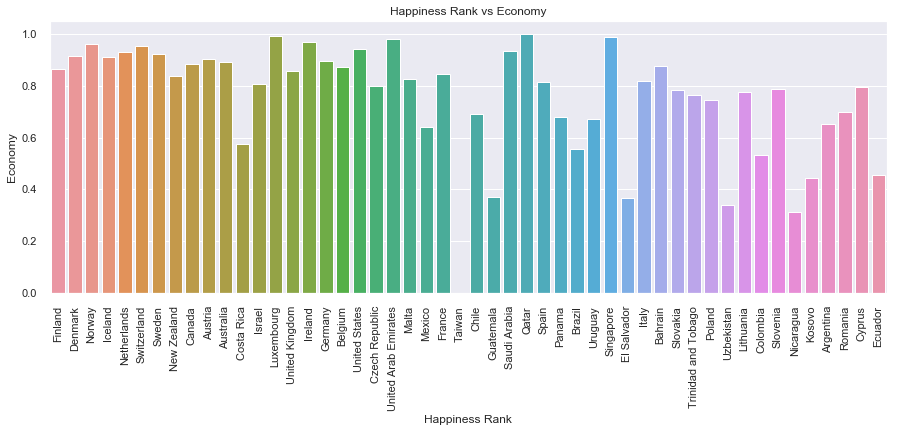

In [70]:
plt.figure(figsize= (15,5))
sns.barplot(x = top_50['Country'], y = top_50['Log of GDP per capita'])
plt.xticks(rotation = 90)
plt.xlabel('Happiness Rank')
plt.ylabel('Economy')
plt.title('Happiness Rank vs Economy')
plt.show()

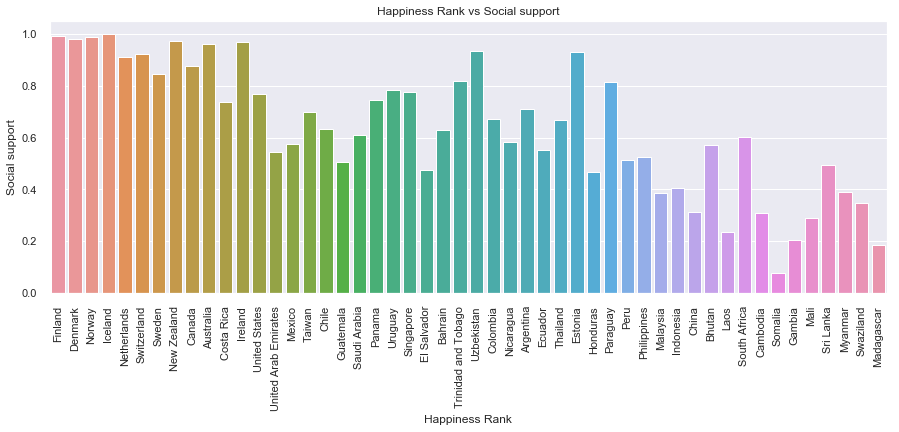

In [15]:
plt.figure(figsize= (15,5))
sns.barplot(x = top_50['Country'], y = top_50['Social support'])
plt.xticks(rotation = 90)
plt.xlabel('Happiness Rank')
plt.ylabel('Social support')
plt.title('Happiness Rank vs Social support')
plt.show()

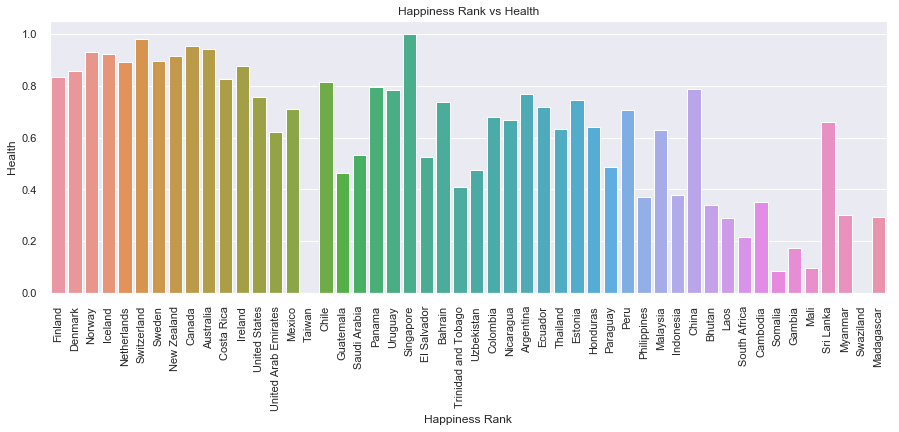

In [16]:
plt.figure(figsize= (15,5))
sns.barplot(x = top_50['Country'], y = top_50['Healthy life expectancy'])
plt.xticks(rotation = 90)
plt.xlabel('Happiness Rank')
plt.ylabel('Health')
plt.title('Happiness Rank vs Health')
plt.show()

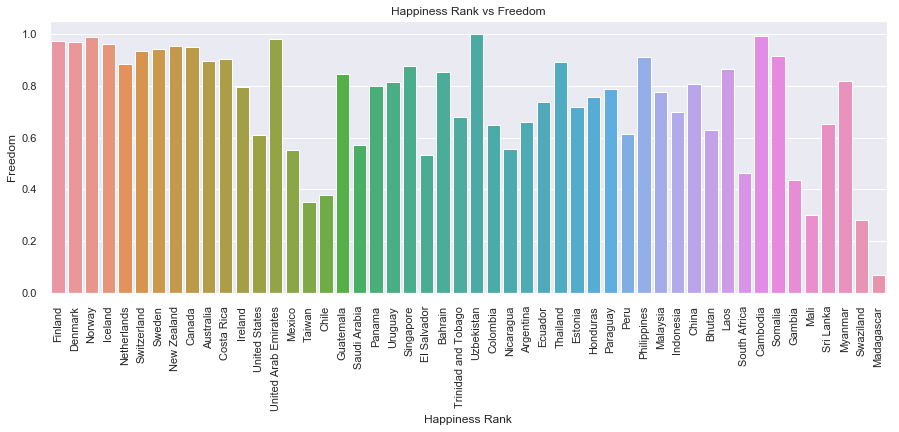

In [17]:
plt.figure(figsize= (15,5))
sns.barplot(x = top_50['Country'], y = top_50['Freedom'])
plt.xticks(rotation = 90)
plt.xlabel('Happiness Rank')
plt.ylabel('Freedom')
plt.title('Happiness Rank vs Freedom')
plt.show()

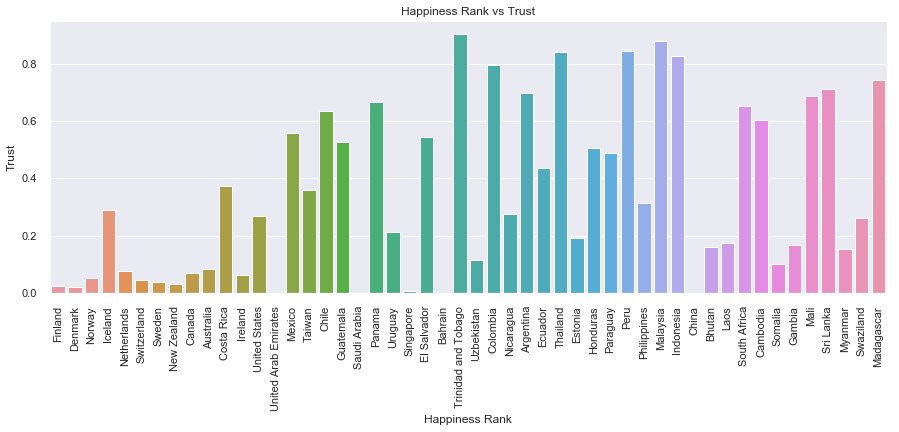

In [18]:
plt.figure(figsize= (15,5))
sns.barplot(x = top_50['Country'], y = top_50['Corruption'])
plt.xticks(rotation = 90)
plt.xlabel('Happiness Rank')
plt.ylabel('Trust')
plt.title('Happiness Rank vs Trust')
plt.show()

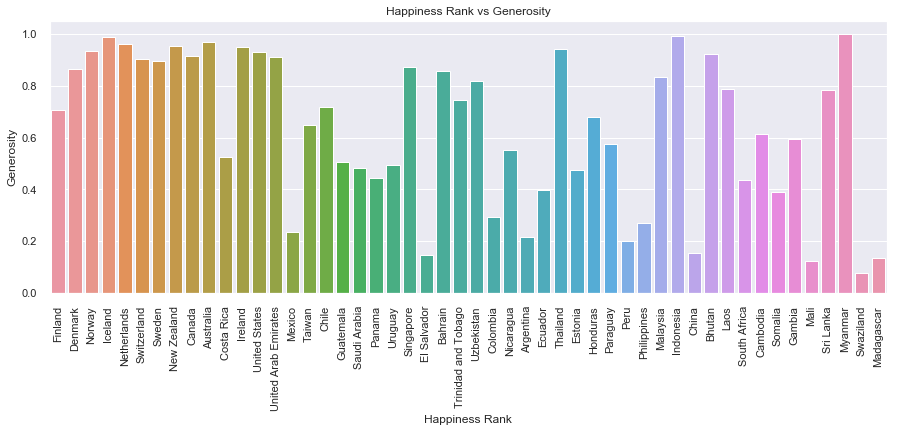

In [19]:
plt.figure(figsize= (15,5))
sns.barplot(x = top_50['Country'], y = top_50['Generosity'])
plt.xticks(rotation = 90)
plt.xlabel('Happiness Rank')
plt.ylabel('Generosity')
plt.title('Happiness Rank vs Generosity')
plt.show()

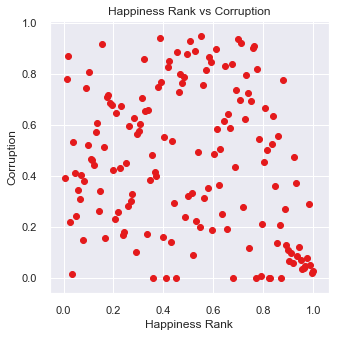

In [21]:
plt.figure(figsize= (5,5))
plt.scatter(x = whdf_2019['Ladder'], y = whdf_2019['Corruption'])
plt.xlabel('Happiness Rank')
plt.ylabel('Corruption')
plt.title('Happiness Rank vs Corruption')
plt.show()

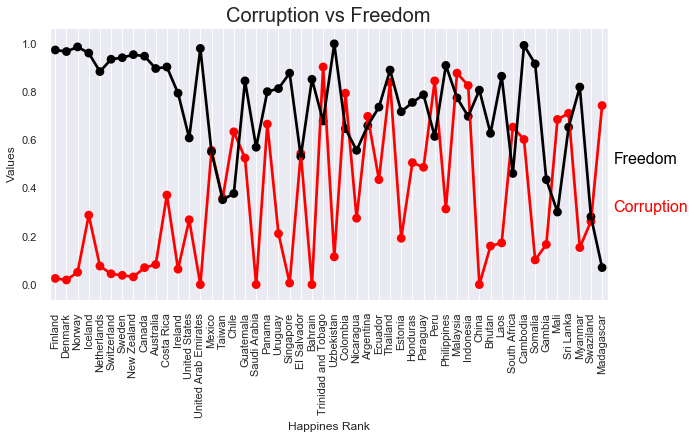

In [22]:
f, ax1 = plt.subplots(figsize=(10,5))
sns.pointplot(x='Country', y='Corruption', data=top_50, color='red', alpha=0.8)
sns.pointplot(x='Country', y='Freedom', data=top_50, color='black', alpha=1)
plt.xticks(rotation = 90)
plt.text(50,0.3, 'Corruption', color='red', fontsize=16)
plt.text(50,0.5, 'Freedom', color='black',fontsize=16)
plt.xlabel('Happines Rank')
plt.ylabel('Values')
plt.title('Corruption vs Freedom', fontsize=20)
plt.grid()

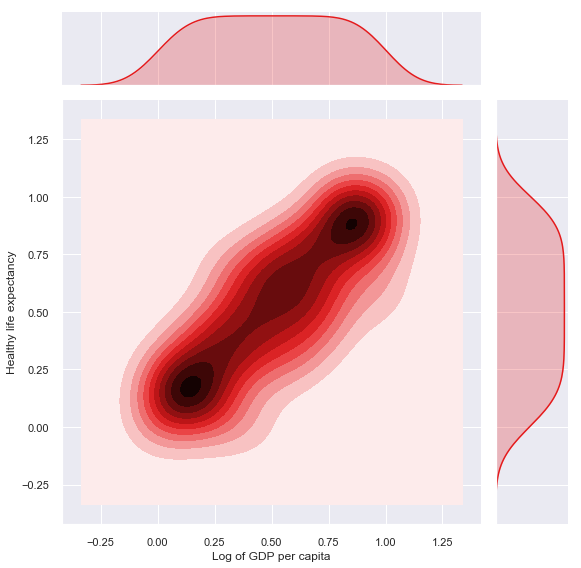

In [24]:
sns.jointplot(whdf_2019['Log of GDP per capita'], whdf_2019['Healthy life expectancy'], kind='kde', height=8)
plt.show()

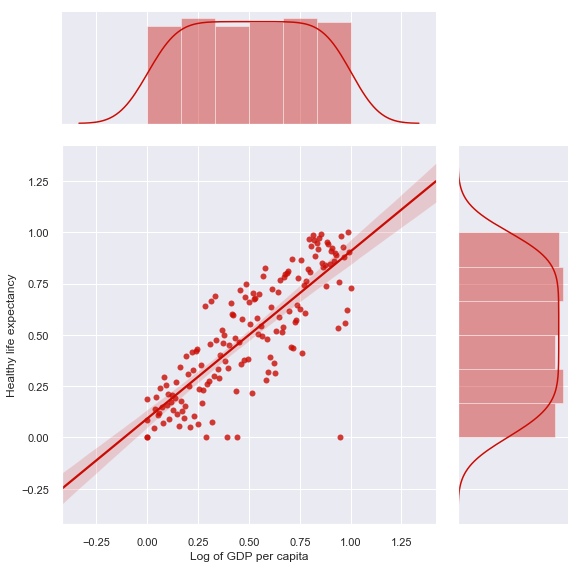

In [26]:
sns.jointplot(whdf_2019['Log of GDP per capita'], whdf_2019['Healthy life expectancy'], kind='reg', height=8,ratio=3, color='r')
plt.show()

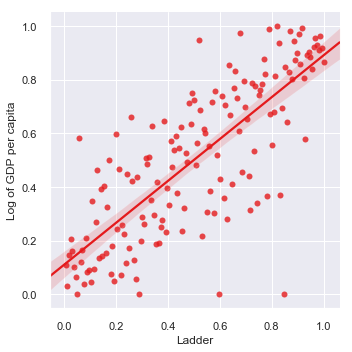

In [27]:
sns.lmplot(x='Ladder', y='Log of GDP per capita', data=whdf_2019)
plt.show()

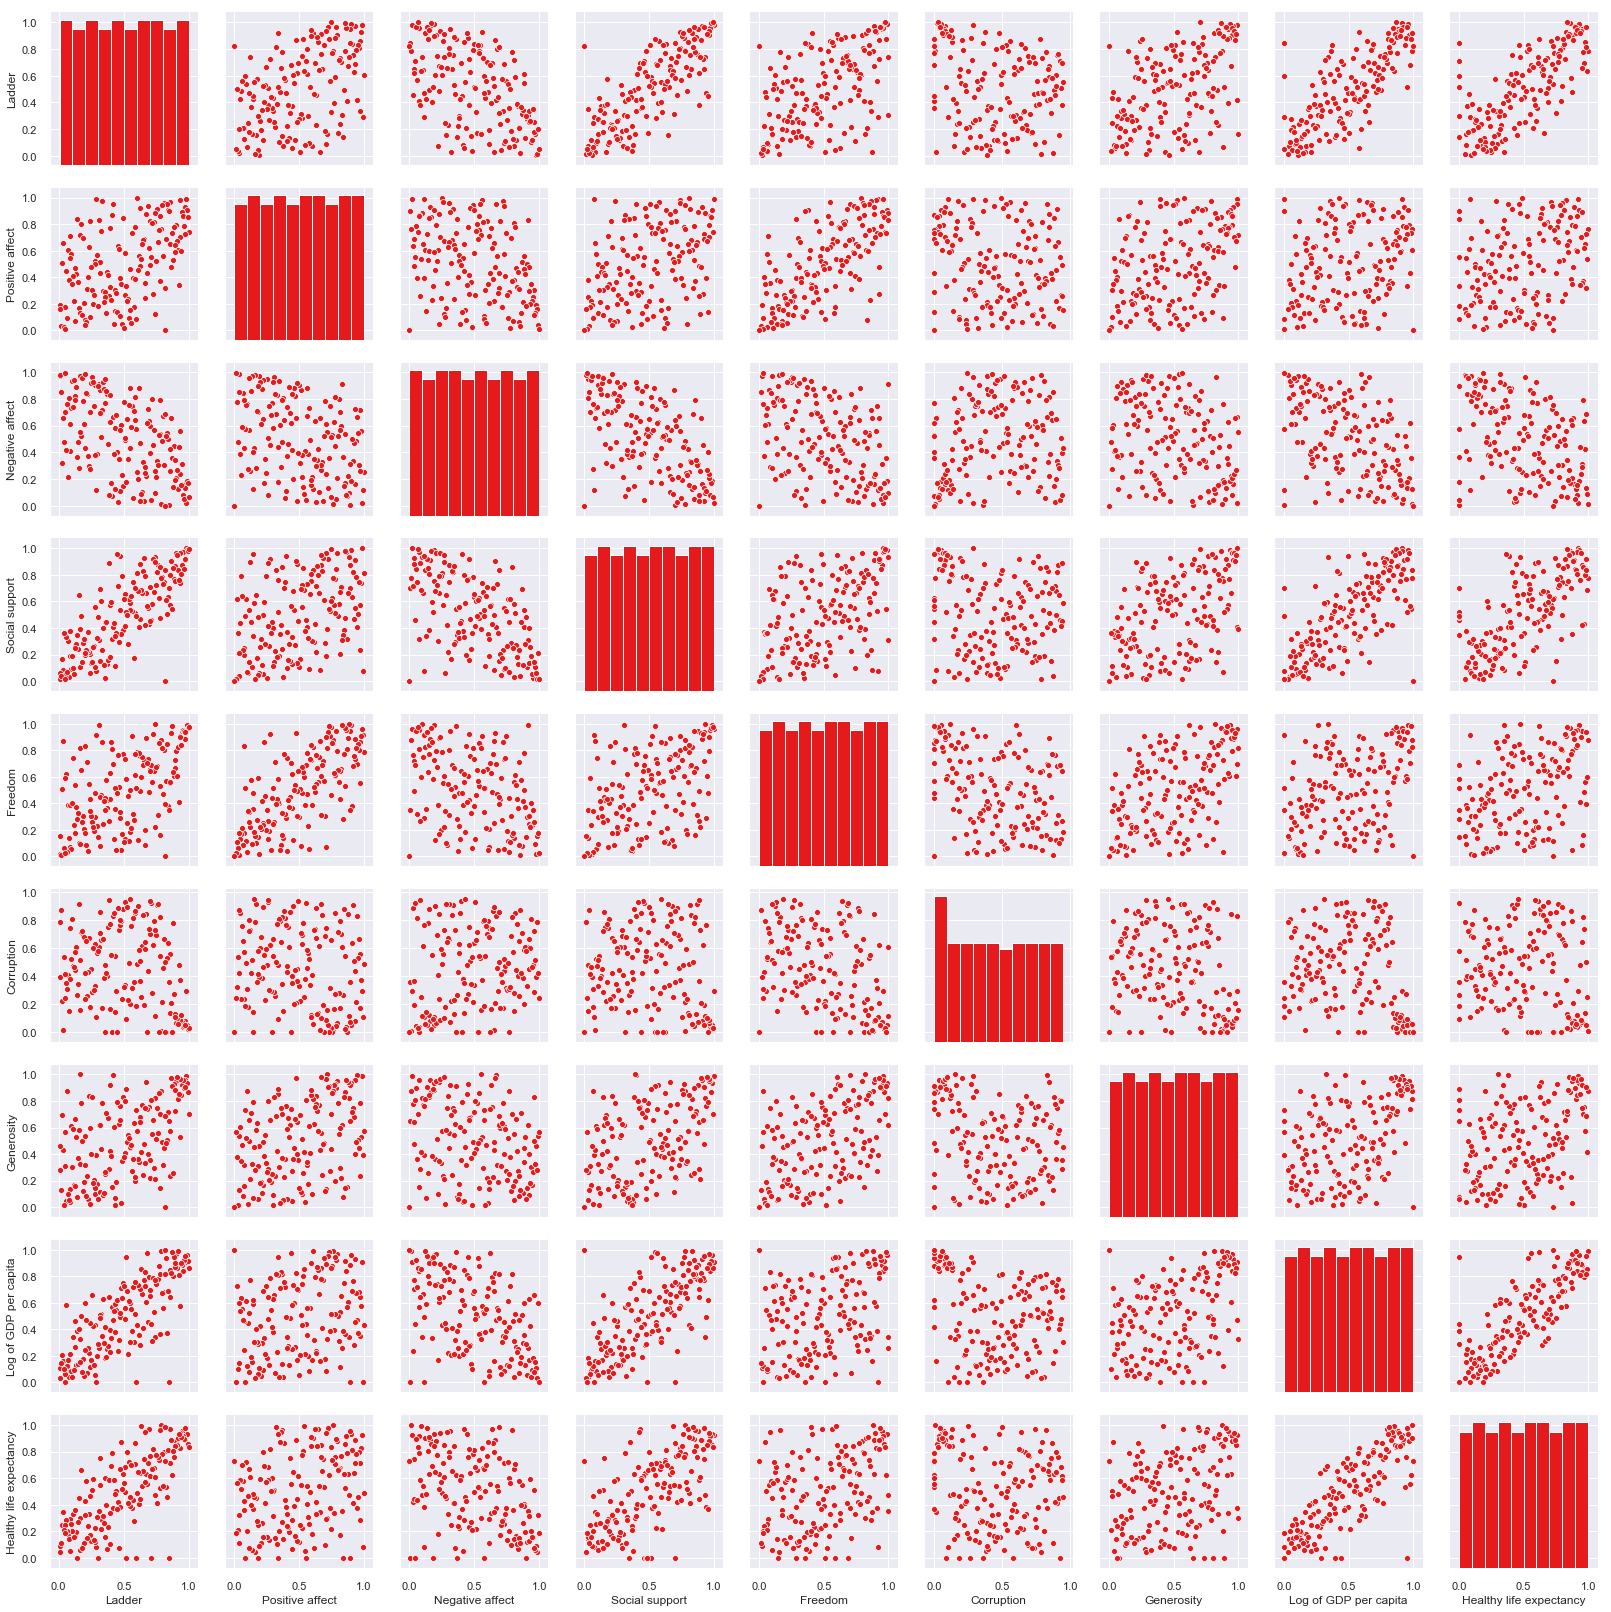

In [28]:
sns.pairplot(whdf_2019)
plt.show()

In [30]:
whdf_model = whdf_2019.drop(['Country', 'Region'], axis=1)

In [33]:
whdf_model.columns

Index(['Ladder', 'Positive affect', 'Negative affect', 'Social support',
       'Freedom', 'Corruption', 'Generosity', 'Log of GDP per capita',
       'Healthy life expectancy'],
      dtype='object')

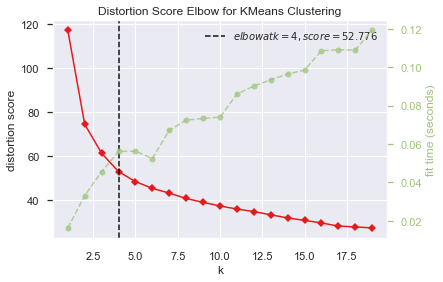

In [34]:
model_KM = KMeans()
visualizer = KElbowVisualizer(model_KM, k=(1,20))
visualizer.fit(whdf_model)
visualizer.poof()

In [35]:
kmeans=KMeans(n_clusters=4)
wh_clusters=kmeans.fit(whdf_model)

In [36]:
whdf_2019['Cluster_KMeans']=wh_clusters.fit_predict(whdf_model)

In [37]:
y_a = kmeans.predict(whdf_model)
print("Silhouette Score: {}".format(m.silhouette_score(whdf_model, y_a)))

Silhouette Score: 0.2652166875723776


In [38]:
whdf_2019.head()

,Country,Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy,Region,Cluster_KMeans
0,Paraguay,0.602564,1.000000,0.250000,0.814103,0.788462,0.487179,0.576923,0.429487,0.487179,Latin America and Caribbean,1
1,Somalia,0.288462,0.993590,0.115385,0.076923,0.916667,0.102564,0.391026,0.000000,0.083333,Sub-Saharan Africa,1
2,Iceland,0.980769,0.987179,0.019231,1.000000,0.961538,0.288462,0.987179,0.910256,0.923077,Western Europe,2
3,Costa Rica,0.929487,0.980769,0.557692,0.737179,0.903846,0.371795,0.525641,0.576923,0.826923,Latin America and Caribbean,2
4,Laos,0.333333,0.974359,0.717949,0.237179,0.865385,0.173077,0.788462,0.352564,0.288462,Southeastern Asia,1


In [39]:
whdf_2019.Cluster_KMeans.value_counts()

0    55
3    36
1    36
2    29
Name: Cluster_KMeans, dtype: int64

In [40]:
whdf_2019.groupby('Cluster_KMeans').describe().T

Cluster_KMeans                         0          1          2          3
Ladder                  count  55.000000  36.000000  29.000000  36.000000
                        mean    0.212821   0.563212   0.877984   0.584936
                        std     0.147314   0.198497   0.103014   0.174864
                        min     0.006410   0.166667   0.634615   0.153846
                        25%     0.092949   0.415064   0.826923   0.472756
                        50%     0.198718   0.596154   0.903846   0.564103
                        75%     0.298077   0.713141   0.955128   0.727564
                        max     0.596154   0.858974   1.000000   0.923077
Positive affect         count  55.000000  36.000000  29.000000  36.000000
                        mean    0.322145   0.788105   0.745137   0.299858
                        std     0.210276   0.163228   0.145861   0.183524
                        min     0.012821   0.333333   0.435897   0.000000
                        25%     0.166667   0.673077   0.647436   0.145833
                        50%     0.294872   0.820513   0.743590   0.298077
                        75%     0.458333   0.918269   0.865385   0.435897
                        max     0.839744   1.000000   0.987179   0.666667
Negative affect         count  55.000000  36.000000  29.000000  36.000000
                        mean    0.712121   0.447115   0.260168   0.408120
                        std     0.224102   0.268328   0.195948   0.247653
                        min     0.217949   0.006410   0.012821   0.000000
                        25%     0.528846   0.243590   0.096154   0.208333
                        50%     0.769231   0.496795   0.192308   0.400641
                        75%     0.900641   0.637821   0.423077   0.636218
                        max     0.993590   0.910256   0.660256   0.865385
Social support          count  55.000000  36.000000  29.000000  36.000000
                        mean    0.215618   0.529024   0.837975   0.646902
                        std     0.136699   0.178474   0.134254   0.227471
                        min     0.012821   0.076923   0.544872   0.000000
                        25%     0.105769   0.408654   0.769231   0.488782
                        50%     0.198718   0.532051   0.865385   0.685897
...                                  ...        ...        ...        ...
Corruption              std     0.203760   0.268805   0.098887   0.265702
                        min     0.000000   0.000000   0.000000   0.000000
                        25%     0.298077   0.328526   0.032051   0.498397
                        50%     0.423077   0.592949   0.076923   0.746795
                        75%     0.586538   0.746795   0.134615   0.860577
                        max     0.871795   0.923077   0.371795   0.948718
Generosity              count  55.000000  36.000000  29.000000  36.000000
                        mean    0.319930   0.573362   0.805482   0.469373
                        std     0.241006   0.260207   0.179006   0.232180
                        min     0.012821   0.147436   0.416667   0.000000
                        25%     0.115385   0.378205   0.724359   0.328526
                        50%     0.262821   0.596154   0.871795   0.477564
                        75%     0.535256   0.783654   0.935897   0.655449
                        max     0.878205   1.000000   0.987179   0.852564
Log of GDP per capita   count  55.000000  36.000000  29.000000  36.000000
                        mean    0.235315   0.461538   0.867374   0.659010
                        std     0.171090   0.201269   0.136188   0.152642
                        min     0.000000   0.000000   0.339744   0.307692
                        25%     0.105769   0.346154   0.852564   0.548077
                        50%     0.192308   0.448718   0.897436   0.701923
                        75%     0.323718   0.604167   0.942308   0.777244
                        max     0.660256   0.948718   0.993590   1.000000
Heal

In [41]:
whdf_2019.groupby('Cluster_KMeans').mean().T

Cluster_KMeans,0,1,2,3
Ladder,0.212821,0.563212,0.877984,0.584936
Positive affect,0.322145,0.788105,0.745137,0.299858
Negative affect,0.712121,0.447115,0.260168,0.408120
Social support,0.215618,0.529024,0.837975,0.646902
Freedom,0.321795,0.691239,0.828691,0.329950
Corruption,0.443240,0.542201,0.105659,0.658832
Generosity,0.319930,0.573362,0.805482,0.469373
Log of GDP per capita,0.235315,0.461538,0.867374,0.659010
Healthy life expectancy,0.238462,0.464922,0.835986,0.674145


In [36]:
# fig,ax=plt.subplots(1,4,figsize=(15,7))
# for i,perp in enumerate([30,45,60,90]):
#    tsne=TSNE(perplexity=perp)
#    new_x=tsne.fit_transform(whdf_model)
#    ax[i].scatter(new_x[:,0],new_x[:,1],c=whdf_2016.Cluster)
#    ax[i].set_title('df perp ='+str(perp))
# plt.show()

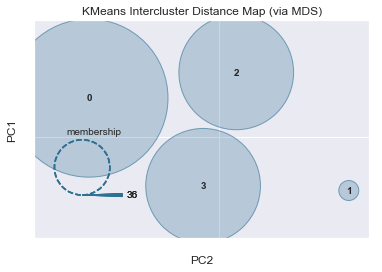

In [42]:
from yellowbrick.cluster import InterclusterDistance
viz = InterclusterDistance(KMeans(4))
viz.fit(whdf_model)
viz.poof()

In [50]:
# Model 2_DBSCAN

from sklearn.cluster import DBSCAN

model_DB = DBSCAN(eps=0.5)
model_DB.fit(whdf_model)
whdf_2019['Cluster_DBSCAN']=model_DB.labels_
whdf_2019['Cluster_DBSCAN'].value_counts()

 0    49
-1    48
 1    44
 3     9
 2     6
Name: Cluster_DBSCAN, dtype: int64

In [56]:
y_b = model_DB.labels_
print("Silhouette Score: {}".format(m.silhouette_score(whdf_model, y_b)))

Silhouette Score: 0.12295704177212134


In [55]:
whdf_2019.groupby('Cluster_DBSCAN').mean().T

Cluster_DBSCAN,-1,0,1,2,3
Ladder,0.486645,0.798666,0.189248,0.575855,0.469373
Positive affect,0.504808,0.740842,0.348048,0.253205,0.125356
Negative affect,0.484776,0.329147,0.729021,0.179487,0.549858
Social support,0.453926,0.751177,0.229458,0.800214,0.555556
Freedom,0.543269,0.757849,0.282051,0.216880,0.174501
Corruption,0.412126,0.350340,0.513986,0.700855,0.767806
Generosity,0.597890,0.643250,0.259615,0.317308,0.549858
Log of GDP per capita,0.475828,0.741366,0.231643,0.707265,0.537037
Healthy life expectancy,0.479701,0.757457,0.209499,0.561966,0.626068
Cluster_KMeans,1.333333,1.816327,0.090909,3.000000,3.000000


In [51]:
whdf_2019.head()

,Country,Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy,Region,Cluster_KMeans,Cluster_DBSCAN
0,Paraguay,0.602564,1.000000,0.250000,0.814103,0.788462,0.487179,0.576923,0.429487,0.487179,Latin America and Caribbean,1,-1
1,Somalia,0.288462,0.993590,0.115385,0.076923,0.916667,0.102564,0.391026,0.000000,0.083333,Sub-Saharan Africa,1,-1
2,Iceland,0.980769,0.987179,0.019231,1.000000,0.961538,0.288462,0.987179,0.910256,0.923077,Western Europe,2,0
3,Costa Rica,0.929487,0.980769,0.557692,0.737179,0.903846,0.371795,0.525641,0.576923,0.826923,Latin America and Caribbean,2,0
4,Laos,0.333333,0.974359,0.717949,0.237179,0.865385,0.173077,0.788462,0.352564,0.288462,Southeastern Asia,1,-1


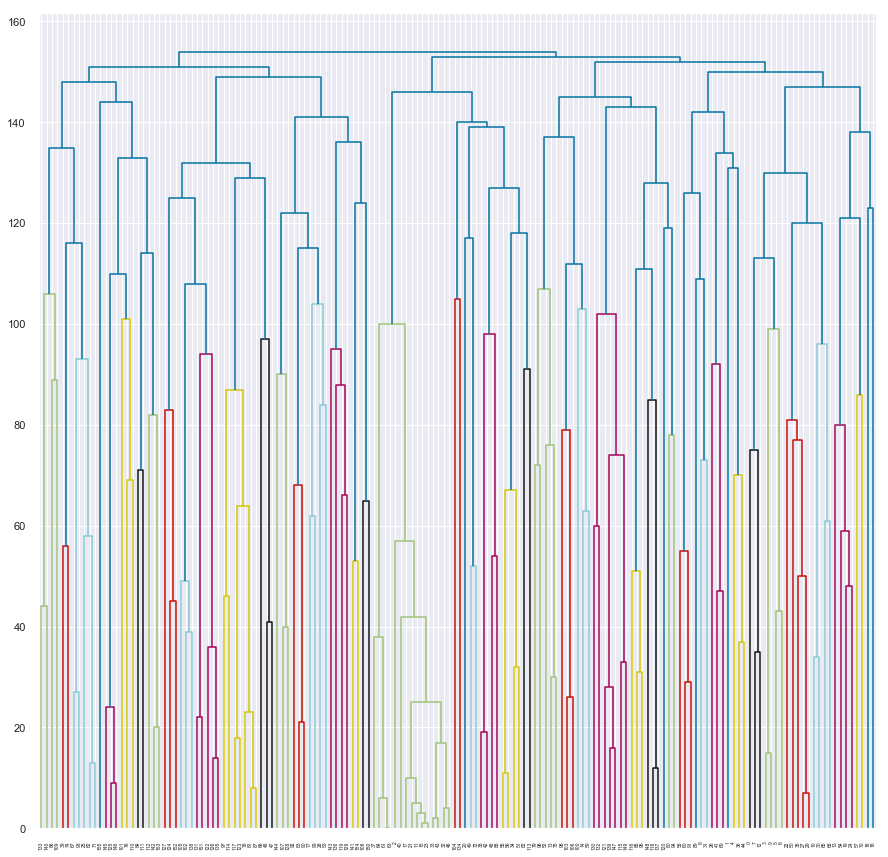

In [52]:
# model 3 + dendogram

from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

hierarchy=AgglomerativeClustering(linkage='ward')
hierarchy.fit(whdf_model)

def plot_dendrogram(model, **kwargs):
    WHM=model.children_
    distance=np.arange(WHM.shape[0])
    no_observations=np.arange(2,WHM.shape[0]+2)
    linkage_matrix = np.column_stack([WHM,distance,no_observations]).astype(float)
    plt.figure(figsize=(15, 15))
#     plt.xticks(whdf_2016['Country'])

    dendrogram(linkage_matrix,**kwargs)
    
plot_dendrogram(hierarchy)

In [54]:
whdf_2019.to_csv('C:/Users/Claire/Downloads/FinalP_WorldHappiness/whdf_2019_final.csv')